In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
df=pd.read_excel("data6.xlsx")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,0.015870
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.013400
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.020580
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.018670
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.018850
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.011370
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.010390
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.014480
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.012260
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.014320


In [4]:
from sklearn.preprocessing import LabelEncoder
le_diagnosis=LabelEncoder()
df["diagno_n"]=le_diagnosis.fit_transform(df["diagnosis"])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(["id","diagnosis","diagno_n"],axis=1),df.diagno_n,train_size=0.8)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,C=10)
model.fit(x_train,y_train)

C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
print("classification score :",model.score(x_test,y_test))

classification score : 0.956140350877193


In [6]:
y_pred=model.predict(x_test)
print("classification accuracy is :",metrics.accuracy_score(y_test,y_pred))

classification accuracy is : 0.956140350877193


In [16]:
print(metrics.confusion_matrix(y_test,y_pred))

[[61  5]
 [ 6 42]]


In [17]:
cn=metrics.confusion_matrix(y_test,y_pred)
t_p=cn[1,1]
t_n=cn[0,0]
f_p=cn[0,1]
f_n=cn[1,0]
print("True_positive:",t_p)
print("False_positive:",f_p)
print("True_negative:",t_n)
print("False_negative:",f_n)

True_positive: 42
False_positive: 5
True_negative: 61
False_negative: 6


In [18]:
print("classification accuracy:",(t_p+t_n)/float(t_p+t_n+f_p+f_n))
print(" classification error:",(f_p+f_n)/float(t_p+t_n+f_p+f_n))
print("Sensitivity: ",t_p/float(f_n+t_p))
print("Specificity: ",t_n/(t_n+f_p))
print("Precision :",t_p/(t_p+f_p))
print("false positive rate:",f_p/(f_p+t_n))

classification accuracy: 0.9035087719298246
 classification error: 0.09649122807017543
Sensitivity:  0.875
Specificity:  0.9242424242424242
Precision : 0.8936170212765957
false positive rate: 0.07575757575757576


C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


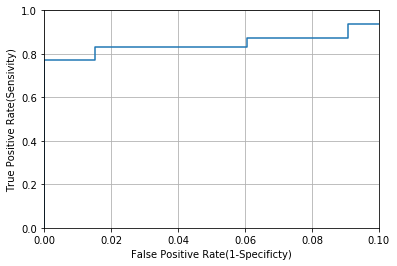

In [19]:
probas_ =model.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.xlim(0,0.1)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("True Positive Rate(Sensivity)")
plt.xlabel("False Positive Rate(1-Specificty)")
plt.plot(fpr,tpr,label='(AUC = %0.2f)' % (roc_auc))

In [20]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concave points_se,diagno_n
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.011796,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.006170,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.007638,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.010930,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.014710,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,0.052790,1.000000
